### Welcome to the `Efficient Self-Attention Intuition` Workshop!
In this workshop, we'll try to visually understand following concepts:
- Overlap Patch Embedding / Merging
- Efficient Self Attention

## Library imports

In [1]:
# basic imports
import pickle
import numpy as np
import matplotlib.pyplot as plt    

# utility library for transforming tensors
!pip install einops    
from einops import rearrange

## Read input data

In [2]:
with open('../input/attention-concept-data/attention_concept_data.pickle', 'rb') as handle:
    data = pickle.load(handle)
print(data.keys())

dict_keys(['key', 'query', 'value', 'attn', 'rgb_img', 'tf_img', 'patch_embed_output'])


## Helper functions for Plotting 

In [3]:
def plot_channels(inputData, num_rows, num_cols, figsize, figTitle, save_plot = False, cmap=None):
    fig, axes = plt.subplots(num_rows, num_cols, figsize=figsize)
    axes = axes.flatten()

    for i in range(len(axes)):
        axes[i].imshow(inputData[i], cmap=cmap)
        axes[i].axis('off')    
        fig.subplots_adjust(wspace=0, hspace=0)
    plt.suptitle(figTitle);
    if(save_plot):
        fig.savefig(f"{figTitle}.png")

In [4]:
def plot_single_channel_image(inputData, figsize, figTitle, save_plot = False, cmap=None):
    plt.figure(figsize=figsize)
    plt.imshow(inputData, cmap = cmap)
    plt.suptitle(figTitle);
    plt.axis('off');   
    if(save_plot):
        plt.savefig(f"{figTitle}.png")    

## Input Image

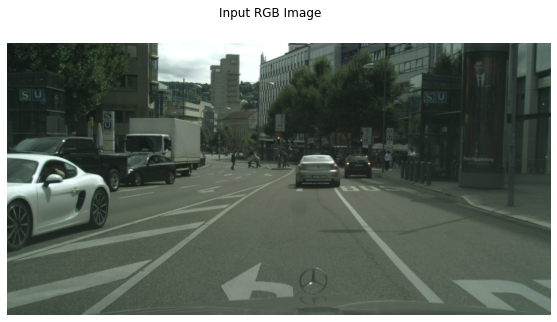

In [5]:
plot_single_channel_image(data['rgb_img'], (10,5), 'Input RGB Image')

## Overlap patch Embedding / Merging
- Entire image is split into patches which are passed to consequent Transformer blocks
- This layer acts like Embedding layer using Convolution layers
- Initial stage outputs indicate low-level features like edge detection and more abstract features in later stages 

patch_embed_img.shape = (64, 128, 256)


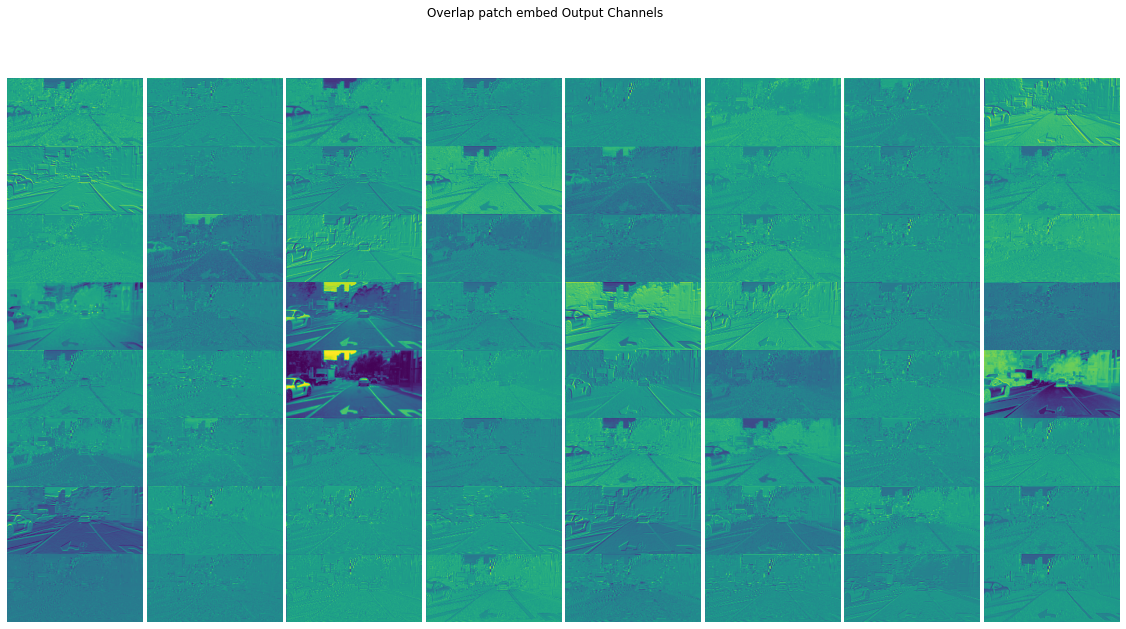

In [6]:
# read patch embedding layer output
patch_embed_output = data['patch_embed_output'][0]
patch_embed_img = rearrange(patch_embed_output, '(h w) c -> c h w', h=128, w=256)
print(f"patch_embed_img.shape = {patch_embed_img.shape}")

# plot each channel of patch embedding 
plot_channels(patch_embed_img, 8, 8, (20,10), 'Overlap patch embed Output Channels')

## Attention mechanism
- Attention mechanism involves 3 components - Query, Key and Value
- It is a mapping a query and a set of key-value pairs to an output,
- Output is computed as a weighted sum of the values, where the weight assigned to each value is computed by similarity b/w query and corresponding key

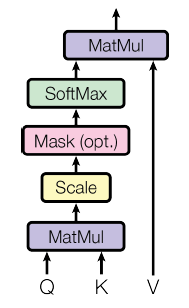

[Image reference](https://arxiv.org/abs/1706.03762)

**NOTE**
- Keys refer to input space (eg : embedded version of image coordinates)
- Query refers to output space (eg : Euclidean space in metres)
- Value can be any property in output space (eg: Depth, Speed of object at that location etc) 

## Query Visualization
- Query tries to match with certain features of specific type

query_img.shape = (64, 128, 256)


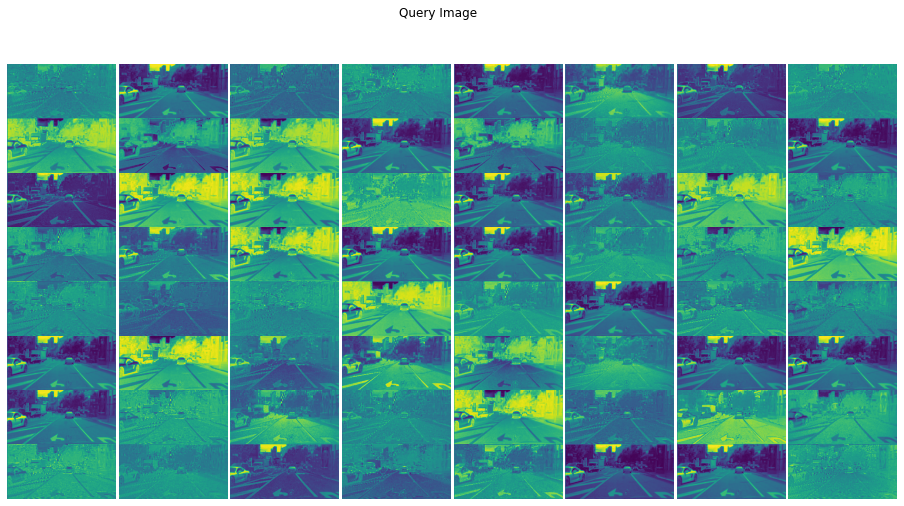

In [8]:
# query for first stage first block of transformer
query = data['query'][0][0]
query_img = rearrange(query, '(h w) c -> c h w', h=128, w=256)
print(f"query_img.shape = {query_img.shape}")

# plot each channel of Query 
plot_channels(query_img, 8, 8, (16,8), 'Query Image')

## Key Visualization
- Key vector encodes that it's part of some object at some pixel location in input space and looking for features of specific type
- In Efficient self-attention, Key vector is << Query and hence appears pixelated

key_img.shape = (64, 16, 32)


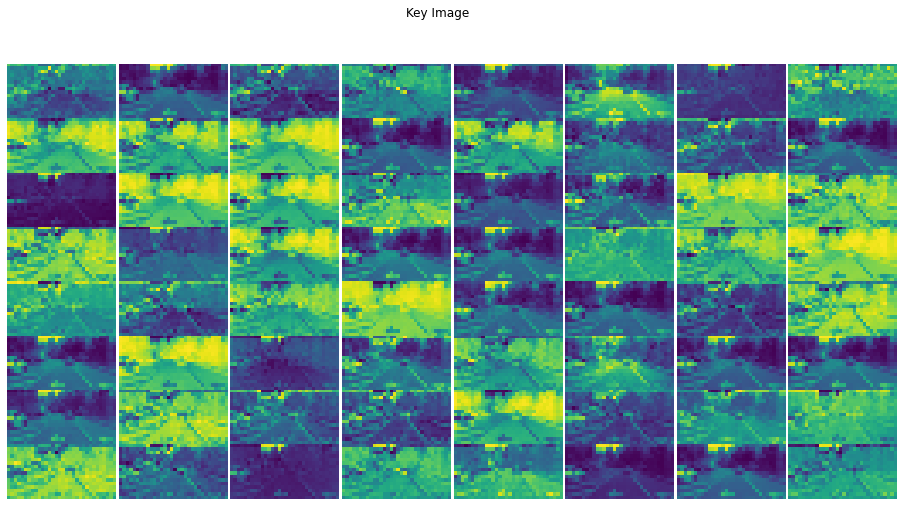

In [7]:
# key for first stage first block of transformer
key = data['key'][0][0]
key_img = rearrange(key, '(h w) c -> c h w', h=16, w=32)
print(f"key_img.shape = {key_img.shape}")

# plot each channel of Key of Transformer 
plot_channels(key_img, 8, 8, (16,8), 'Key Image')

## Attention mechanism

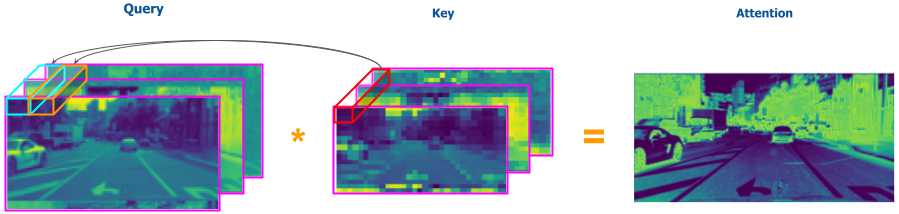

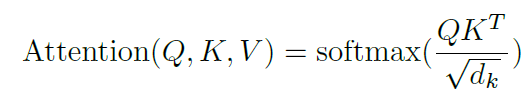

- Dot product is computed b/w each pixel combination in Query and Key matrices
- Output is scaled by key dimension and then softmax is applied
- Here, First pixel in Key contains **dark colored pixel** and we're comparing this feature with all pixels in Query Matrix
- **Pixels where query is similar to key (dark colored pixel) are given more weight in Attention output**


## Attention Visualization

attention_img.shape = (128, 256)


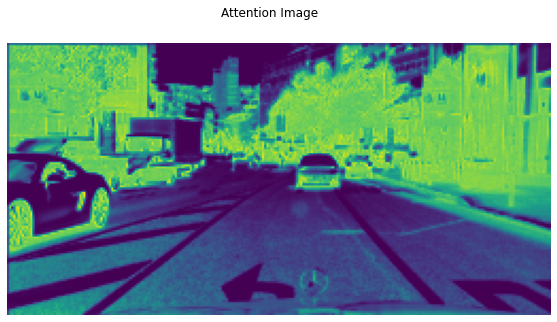

In [9]:
# Attention of 1st pixel in key w.r.t all Query pixels
attention = data['attn'][0, :, :, 0]
attention_img = attention.reshape(128,256)
print(f"attention_img.shape = {attention_img.shape}")
plot_single_channel_image(attention_img, (10,5), 'Attention Image', save_plot=True)